In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
import os
import shutil
import yaml
import cv2
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO

import random
from sklearn.model_selection import train_test_split

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
rf = Roboflow(api_key="iGiuBdxOhewU3Arj4kZ1")
project = rf.workspace("wiwi-isfyl").project("ucf")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to UCF-1 in yolov8:: 100%|██████████| 3720/3720 [00:00<00:00, 6567.00it/s]


In [8]:
print(f"Dataset: {dataset.location}")

Dataset: /content/UCF-1


In [9]:
#  Explorar datos descargados
def explorar_dataset(dataset_path, nombre_dataset):
    print(f"Explorando {nombre_dataset}:")
    print(f"Ubicación: {dataset_path}")

    splits = ['train', 'valid', 'test']
    for split in splits:
        img_path = os.path.join(dataset_path, split, 'images')
        lbl_path = os.path.join(dataset_path, split, 'labels')

        if os.path.exists(img_path):
            num_images = len([f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
            print(f"  {split}: {num_images} imágenes")

        if os.path.exists(lbl_path):
            num_labels = len([f for f in os.listdir(lbl_path) if f.endswith('.txt')])
            print(f"  {split}: {num_labels} etiquetas")

    print()

In [10]:
explorar_dataset(dataset.location, "Abuse Segmentación")

Explorando Abuse Segmentación:
Ubicación: /content/UCF-1
  train: 1857 imágenes
  train: 1857 etiquetas



In [11]:
# Visualizar muestras originales
def visualizar_muestra_original(dataset_path, split='train', num_muestras=3):
    img_path = os.path.join(dataset_path, split, 'images')
    lbl_path = os.path.join(dataset_path, split, 'labels')

    if not os.path.exists(img_path):
        return

    imagenes = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png', '.jpeg'))][:num_muestras]

    fig, axes = plt.subplots(1, len(imagenes), figsize=(15, 5))
    if len(imagenes) == 1:
        axes = [axes]

    for i, img_name in enumerate(imagenes):
        img_file = os.path.join(img_path, img_name)
        image = cv2.imread(img_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        lbl_file = os.path.join(lbl_path, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(lbl_file):
            with open(lbl_file, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) > 5:
                    coords = list(map(float, parts[1:]))
                    coords = np.array(coords).reshape(-1, 2)
                    coords[:, 0] *= image.shape[1]
                    coords[:, 1] *= image.shape[0]
                    coords = coords.astype(int)

                    cv2.polylines(image, [coords], True, (255, 0, 0), 2)

        axes[i].imshow(image)
        axes[i].set_title(f"{img_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

Muestras de Datasets:


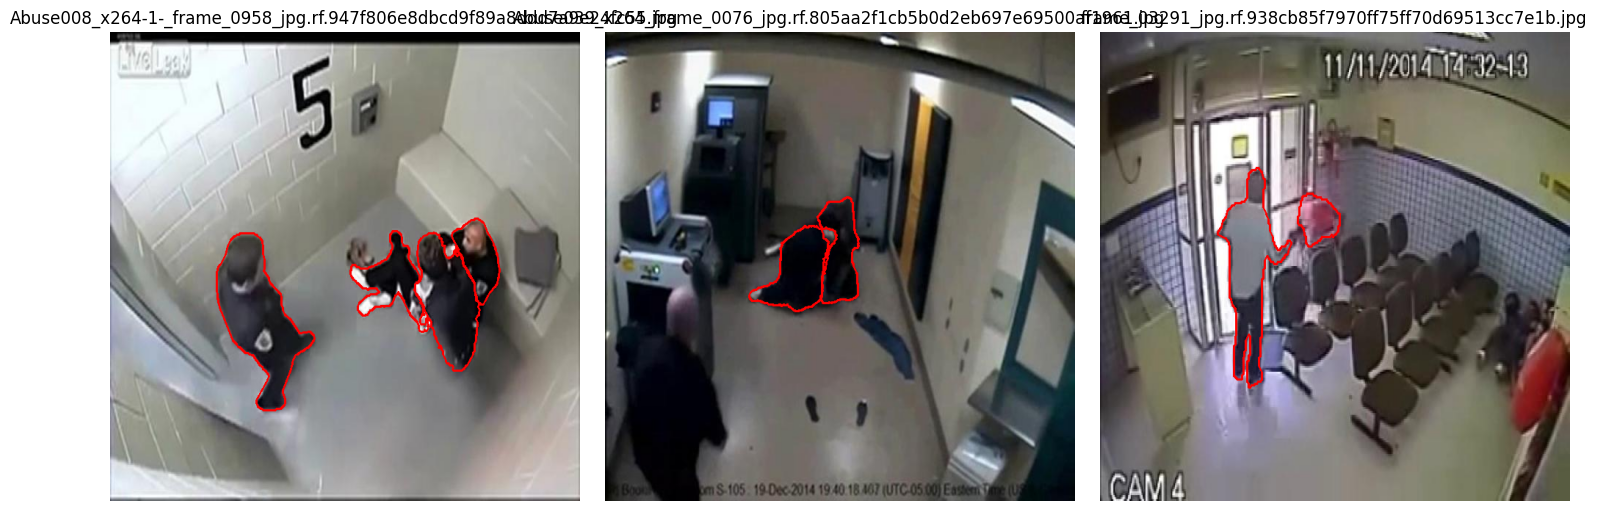

In [12]:
print("Muestras de Datasets:")
visualizar_muestra_original(dataset.location)

In [13]:
def verificar_estructura(dataset_path, nombre):
    print(f"\nVerificando {nombre}:")
    print(f"Ruta: {dataset_path}")

    train_img = os.path.join(dataset_path, 'train', 'images')
    train_lbl = os.path.join(dataset_path, 'train', 'labels')
    valid_img = os.path.join(dataset_path, 'valid', 'images')
    test_img = os.path.join(dataset_path, 'test', 'images')

    if os.path.exists(train_img):
        num_train_img = len([f for f in os.listdir(train_img) if f.endswith(('.jpg', '.png'))])
        print(f"Train imágenes: {num_train_img}")

    if os.path.exists(train_lbl):
        num_train_lbl = len([f for f in os.listdir(train_lbl) if f.endswith('.txt')])
        print(f"Train etiquetas: {num_train_lbl}")

    if os.path.exists(valid_img):
        num_valid = len([f for f in os.listdir(valid_img) if f.endswith(('.jpg', '.png'))])
        print(f"Valid imágenes: {num_valid}")
    else:
        print("Valid: No existe")

    if os.path.exists(test_img):
        num_test = len([f for f in os.listdir(test_img) if f.endswith(('.jpg', '.png'))])
        print(f"Test imágenes: {num_test}")
    else:
        print("Test: No existe")

In [17]:
verificar_estructura(dataset.location, "UCF")


Verificando UCF:
Ruta: /content/UCF-1
Train imágenes: 1857
Train etiquetas: 1857
Valid: No existe
Test: No existe


In [15]:
def verificar_orden_archivos(dataset_path, nombre):
    train_img = os.path.join(dataset_path, 'train', 'images')

    if os.path.exists(train_img):
        archivos = [f for f in os.listdir(train_img) if f.endswith(('.jpg', '.png'))]
        archivos.sort()

        print(f"\n{nombre} - Primeros 10 archivos:")
        for i, archivo in enumerate(archivos[:10]):
            print(f"{i+1}: {archivo}")

        print(f"\nTotal archivos: {len(archivos)}")
        return archivos
    return []

In [20]:
archivos_ucf = verificar_orden_archivos(dataset.location, "UCF")


UCF - Primeros 10 archivos:
1: Abuse001_x264_frame_0030_jpg.rf.ef3213ac3240d7d8069ebb74b26ae561.jpg
2: Abuse001_x264_frame_0031_jpg.rf.f4ef76cd0d563394bef5ed0556bf3205.jpg
3: Abuse001_x264_frame_0032_jpg.rf.05f54c8b2336d7130160983799b1bd2b.jpg
4: Abuse001_x264_frame_0033_jpg.rf.cf15f0ae69828c349768dcd7a55b3da2.jpg
5: Abuse001_x264_frame_0034_jpg.rf.3e884ec5c0fda8477ec706a2d275aa3a.jpg
6: Abuse001_x264_frame_0035_jpg.rf.97a22d606c8a24fe400dd84637d9f2a0.jpg
7: Abuse001_x264_frame_0036_jpg.rf.198c12ea40b3f7224648954c193d5408.jpg
8: Abuse001_x264_frame_0037_jpg.rf.96b9ea23c98821435bce0bda9cb52119.jpg
9: Abuse001_x264_frame_0038_jpg.rf.ea2a6f3962b7db517c35b2c3816d0b4e.jpg
10: Abuse001_x264_frame_0039_jpg.rf.b6ca58a8eac3ee31cdacf0ea93636f31.jpg

Total archivos: 1857


In [19]:
def dividir_datos_ordenados(archivos, train_ratio=0.7, valid_ratio=0.2, test_ratio=0.1):
    total = len(archivos)

    train_end = int(total * train_ratio)
    valid_end = int(total * (train_ratio + valid_ratio))

    train_files = archivos[:train_end]
    valid_files = archivos[train_end:valid_end]
    test_files = archivos[valid_end:]

    print(f"División ordenada:")
    print(f"Train: {len(train_files)} archivos")
    print(f"Valid: {len(valid_files)} archivos")
    print(f"Test: {len(test_files)} archivos")

    return train_files, valid_files, test_files

In [21]:
train_ucf, valid_ucf, test_ucf = dividir_datos_ordenados(archivos_ucf)

División ordenada:
Train: 1299 archivos
Valid: 372 archivos
Test: 186 archivos


In [36]:
def crear_estructura_unificada():
    splits = ['train', 'valid', 'test']
    tipos = ['images', 'labels']

    for split in splits:
        for tipo in tipos:
            carpeta = f'UCF/{split}/{tipo}'
            os.makedirs(carpeta, exist_ok=True)

In [37]:
crear_estructura_unificada()

In [38]:
def leer_clases_yaml(yaml_path):
    with open(yaml_path, 'r') as f:
        config = yaml.safe_load(f)
    return config['names']

def convertir_a_dict(clases):
    if isinstance(clases, list):
        return {i: nombre for i, nombre in enumerate(clases)}
    return clases

In [39]:
clases_ucf = convertir_a_dict(leer_clases_yaml(os.path.join(dataset.location, 'data.yaml')))
print("Clases UCF:", clases_ucf)

Clases UCF: {0: 'Agresor', 1: 'Persona', 2: 'Victima', 3: 'atacante', 4: 'carro', 5: 'persona', 6: 'tirador'}


In [40]:
clases_unificadas = {}
mapeo_ucf = {}

indice_actual = 0

for i, nombre in clases_ucf.items():
    clases_unificadas[indice_actual] = f"ucf_{nombre}"
    mapeo_ucf[i] = indice_actual
    indice_actual += 1

print("\nClases unificadas:")
for i, nombre in clases_unificadas.items():
    print(f"{i}: {nombre}")


Clases unificadas:
0: ucf_Agresor
1: ucf_Persona
2: ucf_Victima
3: ucf_atacante
4: ucf_carro
5: ucf_persona
6: ucf_tirador


In [42]:
def actualizar_etiquetas(archivo_origen, archivo_destino, mapeo_clases):
    with open(archivo_origen, 'r') as f:
        lineas = f.readlines()

    with open(archivo_destino, 'w') as f:
        for linea in lineas:
            partes = linea.strip().split()
            if len(partes) > 0:
                clase_original = int(partes[0])
                if clase_original in mapeo_clases:
                    clase_nueva = mapeo_clases[clase_original]
                    partes[0] = str(clase_nueva)
                    f.write(' '.join(partes) + '\n')

def copiar_archivos_divididos(dataset_path, prefijo, mapeo_clases, train_files, valid_files, test_files):
    original_train_img = os.path.join(dataset_path, 'train', 'images')
    original_train_lbl = os.path.join(dataset_path, 'train', 'labels')

    divisiones = {
        'train': train_files,
        'valid': valid_files,
        'test': test_files
    }

    for split, archivos in divisiones.items():
        for archivo in archivos:
            # Copiar imagen
            src_img = os.path.join(original_train_img, archivo)
            dst_img = f'UCF/{split}/images/{prefijo}_{archivo}'
            if os.path.exists(src_img):
                shutil.copy2(src_img, dst_img)

            # Copiar etiqueta
            lbl_name = archivo.replace('.jpg', '.txt').replace('.png', '.txt')
            src_lbl = os.path.join(original_train_lbl, lbl_name)
            dst_lbl = f'UCF/{split}/labels/{prefijo}_{lbl_name}'
            if os.path.exists(src_lbl):
                actualizar_etiquetas(src_lbl, dst_lbl, mapeo_clases)

In [43]:
print("Copiando UCF...")
copiar_archivos_divididos(dataset.location, 'futbol', mapeo_ucf,
                         train_ucf, valid_ucf, test_ucf)


Copiando UCF...


In [44]:
def verificar_datos_unificados():
    splits = ['train', 'valid', 'test']

    for split in splits:
        img_path = f'UCF/{split}/images'
        lbl_path = f'UCF/{split}/labels'

        num_img = len([f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))])
        num_lbl = len([f for f in os.listdir(lbl_path) if f.endswith('.txt')])

        print(f"{split}: {num_img} imágenes, {num_lbl} etiquetas")

verificar_datos_unificados()

train: 1299 imágenes, 1299 etiquetas
valid: 372 imágenes, 372 etiquetas
test: 186 imágenes, 186 etiquetas


In [47]:
def visualizar_muestra_split(split='train', num_muestras=3):
    img_path = f'UCF/{split}/images'
    lbl_path = f'UCF/{split}/labels'

    archivos = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.png'))]
    archivos.sort()
    muestras = archivos[:num_muestras]

    fig, axes = plt.subplots(1, len(muestras), figsize=(15, 5))
    if len(muestras) == 1:
        axes = [axes]

    for i, img_name in enumerate(muestras):
        img_file = os.path.join(img_path, img_name)
        image = cv2.imread(img_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        lbl_file = os.path.join(lbl_path, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(lbl_file):
            with open(lbl_file, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) > 5:
                    clase = int(parts[0])
                    coords = list(map(float, parts[1:]))
                    coords = np.array(coords).reshape(-1, 2)
                    coords[:, 0] *= image.shape[1]
                    coords[:, 1] *= image.shape[0]
                    coords = coords.astype(int)

                    color = (255, 0, 0) if clase < len(clases_ucf) else (0, 255, 0) if clase < len(clases_ucf) + len(clases_ucf) else (0, 0, 255)
                    cv2.polylines(image, [coords], True, color, 2)

        axes[i].imshow(image)
        axes[i].set_title(f"{split}: {img_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


Muestras Train:


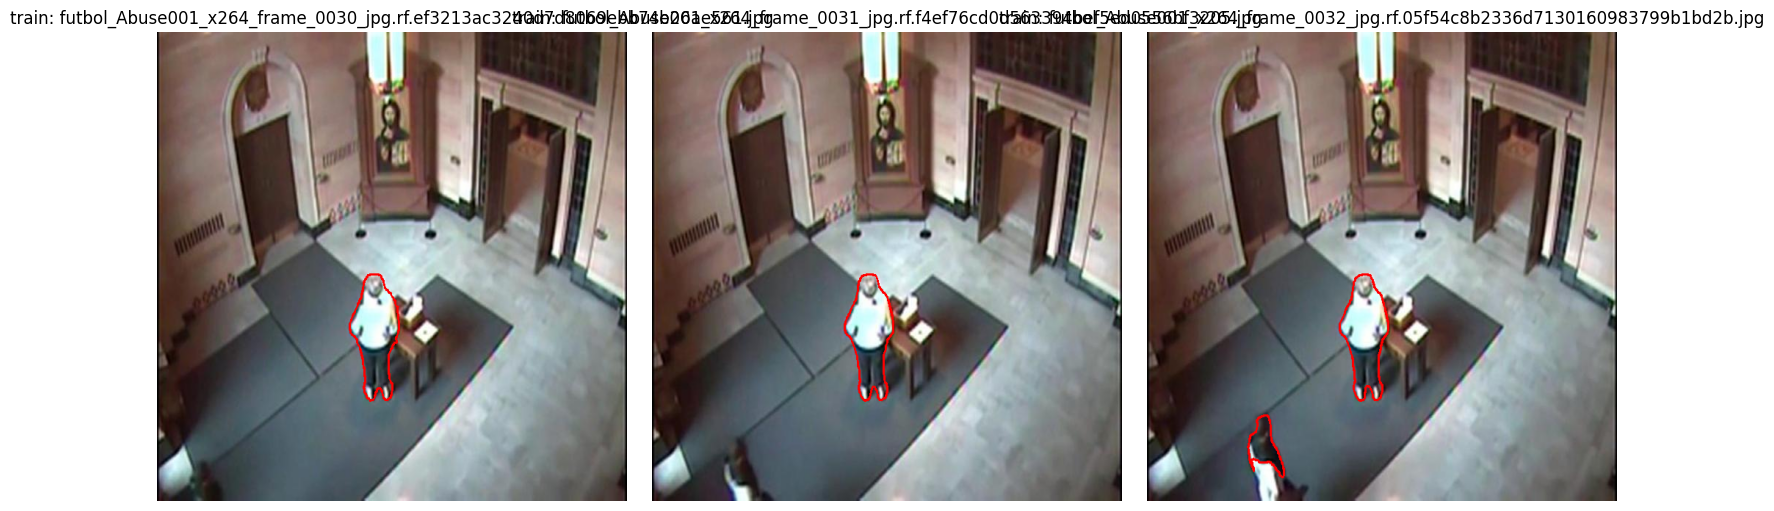

In [48]:
print("Muestras Train:")
visualizar_muestra_split('train')

In [49]:
config_unificado = {
    'path': './UCF',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': clases_unificadas,
    'nc': len(clases_unificadas)
}

with open('ucf.yaml', 'w') as f:
    yaml.dump(config_unificado, f, default_flow_style=False)

print(f"YAML creado con {len(clases_unificadas)} clases")

YAML creado con 7 clases


In [50]:
# Mostrar contenido del YAML
with open('ucf.yaml', 'r') as f:
    print("\nContenido del YAML:")
    print(f.read())


Contenido del YAML:
names:
  0: ucf_Agresor
  1: ucf_Persona
  2: ucf_Victima
  3: ucf_atacante
  4: ucf_carro
  5: ucf_persona
  6: ucf_tirador
nc: 7
path: ./UCF
test: test/images
train: train/images
val: valid/images



In [51]:
model = YOLO('yolov8x-seg.pt')

100%|██████████| 137M/137M [00:02<00:00, 50.5MB/s]


In [52]:
# Configuración de entrenamiento
YOLO_CONFIG = {
    'model_size': 'yolov8x',
    'epochs': 30,
    'imgsz': 640,
    'batch': 8,
    'workers': 4,
    'patience': 4,
    'save_period': 5,
    'lr0': 0.01,
    'lrf': 0.1,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'kobj': 1.0,
    'label_smoothing': 0.0,
    'nbs': 64,
    'hsv_h': 0.025,
    'hsv_s': 0.5,
    'hsv_v': 0.4,
    'degrees': 0.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 0.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.0,
    'copy_paste': 0.0
}

In [53]:
# Cargar modelo pre-entrenado
results = YOLO(f"{YOLO_CONFIG['model_size']}.pt")

100%|██████████| 131M/131M [00:01<00:00, 88.4MB/s]


In [54]:
from pathlib import Path
BASE_DIR = Path("./UCF")
MODELS_DIR = BASE_DIR

In [55]:
# Configurar directorio de resultados para YOLO
yolo_results_dir = MODELS_DIR / "train"
yolo_results_dir.mkdir(exist_ok=True)

In [57]:
# Entrenar modelo
results = model.train(
    data='ucf.yaml',
    epochs=YOLO_CONFIG['epochs'],
    imgsz=YOLO_CONFIG['imgsz'],
    batch=YOLO_CONFIG['batch'],
    workers=YOLO_CONFIG['workers'],
    patience=YOLO_CONFIG['patience'],
    save_period=YOLO_CONFIG['save_period'],
    project=str(MODELS_DIR),
    name='train',
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',
    verbose=True,
    #seed=SEED,
    deterministic=True,
    single_cls=False,
    rect=False,
    cos_lr=False,
    close_mosaic=10,
    resume=False,
    amp=True,
    fraction=1.0,
    profile=False,
    # Hiperparámetros específicos
    lr0=YOLO_CONFIG['lr0'],
    lrf=YOLO_CONFIG['lrf'],
    momentum=YOLO_CONFIG['momentum'],
    weight_decay=YOLO_CONFIG['weight_decay'],
    warmup_epochs=YOLO_CONFIG['warmup_epochs'],
    warmup_momentum=YOLO_CONFIG['warmup_momentum'],
    warmup_bias_lr=YOLO_CONFIG['warmup_bias_lr'],
    box=YOLO_CONFIG['box'],
    cls=YOLO_CONFIG['cls'],
    dfl=YOLO_CONFIG['dfl'],
    label_smoothing=YOLO_CONFIG['label_smoothing'],
    nbs=YOLO_CONFIG['nbs'],
    hsv_h=YOLO_CONFIG['hsv_h'],
    hsv_s=YOLO_CONFIG['hsv_s'],
    hsv_v=YOLO_CONFIG['hsv_v'],
    degrees=YOLO_CONFIG['degrees'],
    translate=YOLO_CONFIG['translate'],
    scale=YOLO_CONFIG['scale'],
    shear=YOLO_CONFIG['shear'],
    perspective=YOLO_CONFIG['perspective'],
    flipud=YOLO_CONFIG['flipud'],
    fliplr=YOLO_CONFIG['fliplr'],
    mosaic=YOLO_CONFIG['mosaic'],
    mixup=YOLO_CONFIG['mixup'],
    copy_paste=YOLO_CONFIG['copy_paste']
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ucf.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.025, hsv_s=0.5, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, p

100%|██████████| 755k/755k [00:00<00:00, 36.7MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 680.8±282.2 MB/s, size: 30.3 KB)


train: Scanning /content/UCF/train/labels... 1299 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1299/1299 [00:00<00:00, 1320.27it/s]

train: /content/UCF/train/images/futbol_frame_00197_jpg.rf.78b25661f88006972cd6cc210f8ec5ea.jpg: 1 duplicate labels removed
train: New cache created: /content/UCF/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 375.4±173.6 MB/s, size: 33.0 KB)


val: Scanning /content/UCF/valid/labels... 372 images, 8 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<00:00, 392.54it/s]


val: New cache created: /content/UCF/valid/labels.cache
Plotting labels to UCF/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to UCF/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.52G      2.661      4.613      4.235       2.72         10        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:14<00:00,  1.63it/s]


                   all        372        764    8.9e-06    0.00234   4.53e-06   4.53e-07          0          0          0          0

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.15G       2.53      4.347      3.923       2.64         11        640: 100%|██████████| 163/163 [02:07<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


                   all        372        764      0.286     0.0136   0.000165   3.73e-05      0.286     0.0079   7.53e-05   1.84e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.16G      2.367      4.184      3.828       2.52         28        640: 100%|██████████| 163/163 [02:08<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.52it/s]


                   all        372        764    0.00456      0.042     0.0022   0.000626    0.00446     0.0268    0.00217   0.000757

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.18G      2.343      4.147       3.74      2.484         13        640: 100%|██████████| 163/163 [02:08<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


                   all        372        764      0.287      0.078     0.0019   0.000667      0.287     0.0673    0.00161   0.000611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30       8.2G      2.253      4.085      3.634      2.399         13        640: 100%|██████████| 163/163 [02:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


                   all        372        764      0.314     0.0261     0.0119    0.00434      0.316     0.0196     0.0135    0.00514

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.21G      2.202      4.012      3.618      2.351         12        640: 100%|██████████| 163/163 [02:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]

                   all        372        764      0.224     0.0117     0.0152    0.00715      0.371      0.012     0.0151    0.00759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.16G      2.156      4.019      3.576      2.321         10        640: 100%|██████████| 163/163 [02:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


                   all        372        764      0.296      0.011    0.00395    0.00136      0.296     0.0117    0.00418    0.00169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.17G      2.112      3.958      3.484      2.274         11        640: 100%|██████████| 163/163 [02:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


                   all        372        764      0.885     0.0222     0.0161    0.00509      0.887     0.0223     0.0173    0.00685

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.19G      2.089      3.893      3.421      2.242         14        640: 100%|██████████| 163/163 [02:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]


                   all        372        764      0.311     0.0151      0.013    0.00487      0.315     0.0141     0.0133     0.0061

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.18G      2.041      3.831      3.327       2.18         12        640: 100%|██████████| 163/163 [02:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.55it/s]

                   all        372        764      0.894     0.0223     0.0247     0.0113      0.898     0.0237     0.0253     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.88G      2.011      3.811      3.319      2.174          8        640: 100%|██████████| 163/163 [02:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.53it/s]

                   all        372        764      0.295     0.0285     0.0063    0.00244      0.294     0.0264    0.00513    0.00227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.18G      2.004      3.781      3.254      2.154         12        640: 100%|██████████| 163/163 [02:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.53it/s]

                   all        372        764      0.443     0.0374     0.0147     0.0055       0.45     0.0179     0.0143    0.00738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.12G      1.973      3.784      3.243       2.13          6        640: 100%|██████████| 163/163 [02:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.56it/s]

                   all        372        764       0.18     0.0168     0.0215    0.00774      0.185     0.0185     0.0211    0.00975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.17G      1.977      3.762      3.177      2.133          9        640: 100%|██████████| 163/163 [02:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


                   all        372        764      0.317     0.0213     0.0154    0.00553      0.317     0.0216     0.0144    0.00662
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

14 epochs completed in 0.653 hours.
Optimizer stripped from UCF/train/weights/last.pt, 143.9MB
Optimizer stripped from UCF/train/weights/best.pt, 143.9MB

Validating UCF/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 125 layers, 71,727,397 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/24 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 1/24 [00:00<00:16,  1.42it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 2/24 [00:01<00:18,  1.17it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:16<00:00,  1.48it/s]


                   all        372        764      0.895     0.0226     0.0247     0.0113      0.898     0.0237     0.0253     0.0123
           ucf_Agresor          8          9          1          0    0.00301   0.000945          1          0      0.006    0.00138
           ucf_Persona         10         13          1          0     0.0155    0.00525          1          0     0.0155    0.00709
           ucf_Victima          4          4          1          0   0.000975   0.000215          1          0    0.00159   0.000501
          ucf_atacante         35         61          1          0    0.00187   0.000677          1          0    0.00155   0.000395
             ucf_carro         53         55          1          0     0.0035    0.00107          1          0    0.00293   0.000786
           ucf_persona        246        416      0.263      0.158      0.139     0.0681      0.287      0.166      0.147      0.075
           ucf_tirador        178        206          1          0   

In [58]:
val_results = model.val(data='ucf.yaml')

print(f"Box mAP@0.5: {val_results.box.map50:.4f}")
print(f"Box mAP@0.5:0.95: {val_results.box.map:.4f}")
print(f"Mask mAP@0.5: {val_results.seg.map50:.4f}")
print(f"Mask mAP@0.5:0.95: {val_results.seg.map:.4f}")

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 125 layers, 71,727,397 parameters, 0 gradients, 343.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 959.2±282.3 MB/s, size: 29.0 KB)


val: Scanning /content/UCF/valid/labels.cache... 372 images, 8 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/47 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   2%|▏         | 1/47 [00:00<00:43,  1.05it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 2/47 [00:01<00:43,  1.03it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:38<00:00,  1.21it/s]


                   all        372        764      0.894     0.0227     0.0244     0.0112        0.9     0.0237     0.0248     0.0121
           ucf_Agresor          8          9          1          0    0.00301   0.000945          1          0      0.006    0.00138
           ucf_Persona         10         13          1          0     0.0155    0.00524          1          0     0.0155    0.00708
           ucf_Victima          4          4          1          0   0.000978    0.00032          1          0    0.00159   0.000501
          ucf_atacante         35         61          1          0    0.00193   0.000681          1          0    0.00154   0.000395
             ucf_carro         53         55          1          0    0.00348    0.00107          1          0    0.00291    0.00078
           ucf_persona        246        416      0.258      0.159      0.137     0.0672      0.297      0.166      0.143     0.0737
           ucf_tirador        178        206          1          0   

In [59]:
def predecir_con_segmentacion(imagen_path, modelo, conf=0.5):
    resultados = modelo.predict(imagen_path, conf=conf, verbose=False)

    if resultados[0].boxes is None:
        return None, None, None, None

    clases_detectadas = resultados[0].boxes.cls.cpu().numpy()
    confianzas = resultados[0].boxes.conf.cpu().numpy()
    boxes = resultados[0].boxes.xyxy.cpu().numpy()
    masks = resultados[0].masks.data.cpu().numpy() if resultados[0].masks is not None else None

    return clases_detectadas, confianzas, boxes, masks

def visualizar_prediccion(imagen_path, modelo, conf=0.5):
    image = cv2.imread(imagen_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    clases, confs, boxes, masks = predecir_con_segmentacion(imagen_path, modelo, conf)

    if clases is not None:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        axes[0].imshow(image_rgb)
        axes[0].set_title('Original')
        axes[0].axis('off')

        image_pred = image_rgb.copy()

        if masks is not None:
            for i, mask in enumerate(masks):
                mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
                mask_bool = mask_resized > 0.5

                color = np.random.randint(0, 255, 3)
                image_pred[mask_bool] = image_pred[mask_bool] * 0.7 + color * 0.3

        for i, (box, conf, clase) in enumerate(zip(boxes, confs, clases)):
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image_pred, (x1, y1), (x2, y2), (255, 255, 255), 2)

            label = f"{clases_unificadas[int(clase)]}: {conf:.2f}"
            cv2.putText(image_pred, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        axes[1].imshow(image_pred.astype(np.uint8))
        axes[1].set_title('Predicción con Segmentación')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"Detectados {len(clases)} objetos")
        for i, (clase, conf) in enumerate(zip(clases, confs)):
            print(f"- {clases_unificadas[int(clase)]}: {conf:.3f}")
    else:
        plt.imshow(image_rgb)
        plt.title('Sin detecciones')
        plt.axis('off')
        plt.show()

In [60]:
def probar_en_test(modelo, num_muestras=5):
    test_path = './UCF/test/images'
    archivos = [f for f in os.listdir(test_path) if f.endswith(('.jpg', '.png'))]
    archivos.sort()

    for archivo in archivos[:num_muestras]:
        imagen_path = os.path.join(test_path, archivo)
        print(f"\nProcesando: {archivo}")
        visualizar_prediccion(imagen_path, modelo)



Procesando: futbol_frame_01892_jpg.rf.51f155bbeb9bdc15c07796df413e6417.jpg


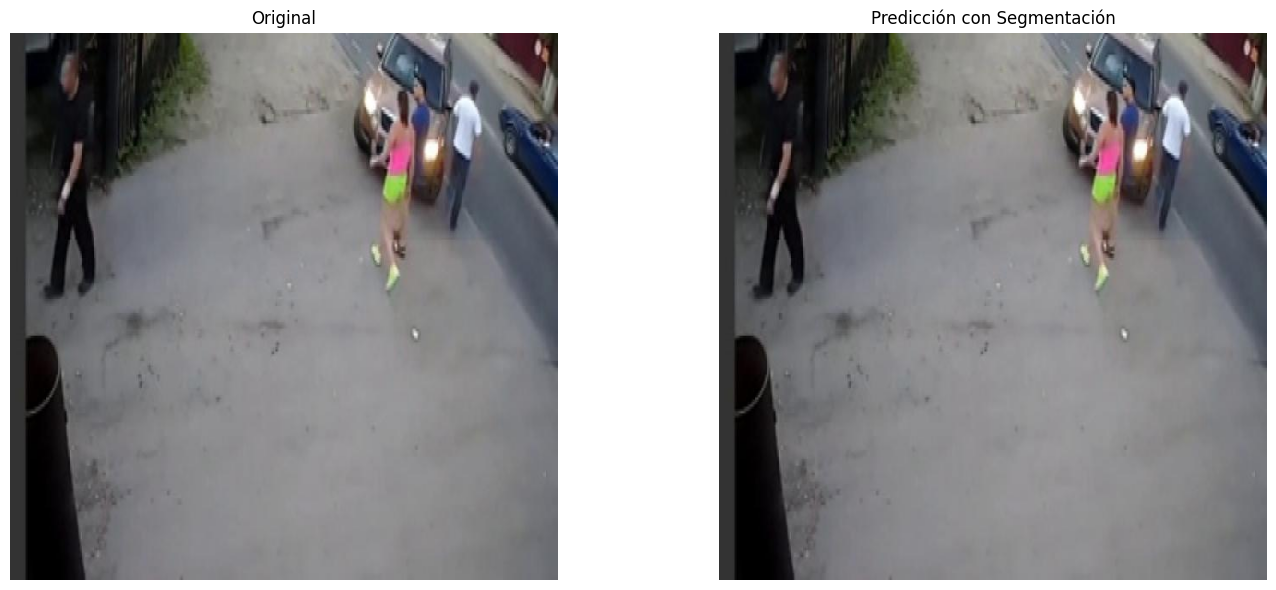

Detectados 0 objetos

Procesando: futbol_frame_01894_jpg.rf.11a35846c17ba7a0dc2fd6ff942d9a72.jpg


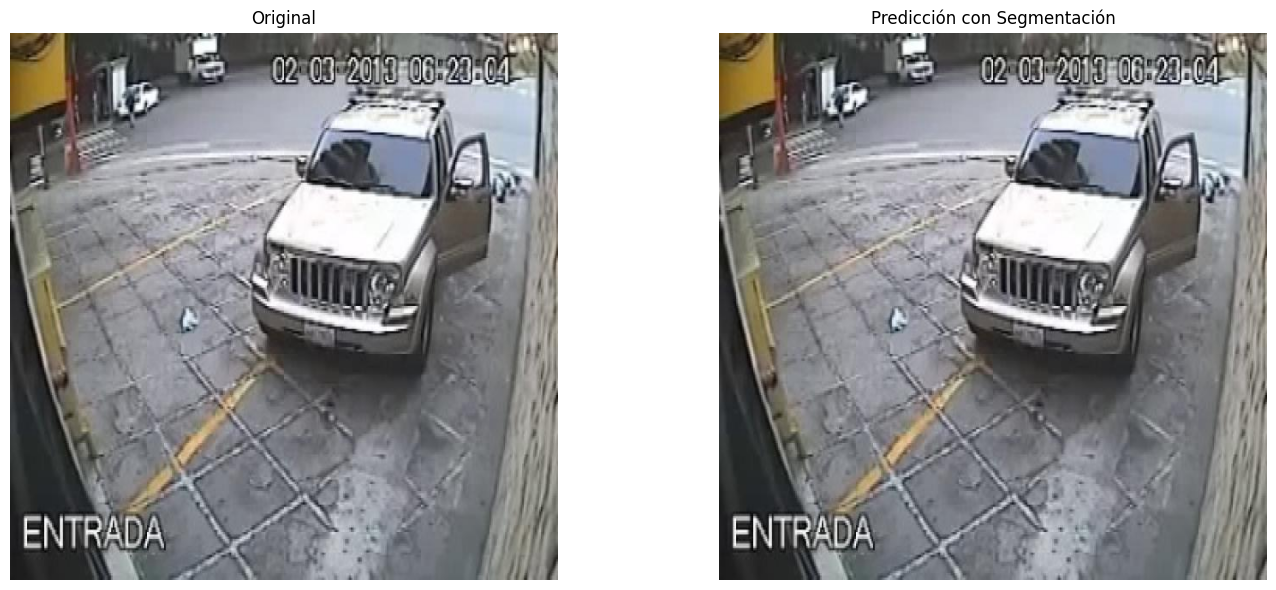

Detectados 0 objetos

Procesando: futbol_frame_01903_jpg.rf.9265bf037f3dd21feab975c8a955e426.jpg


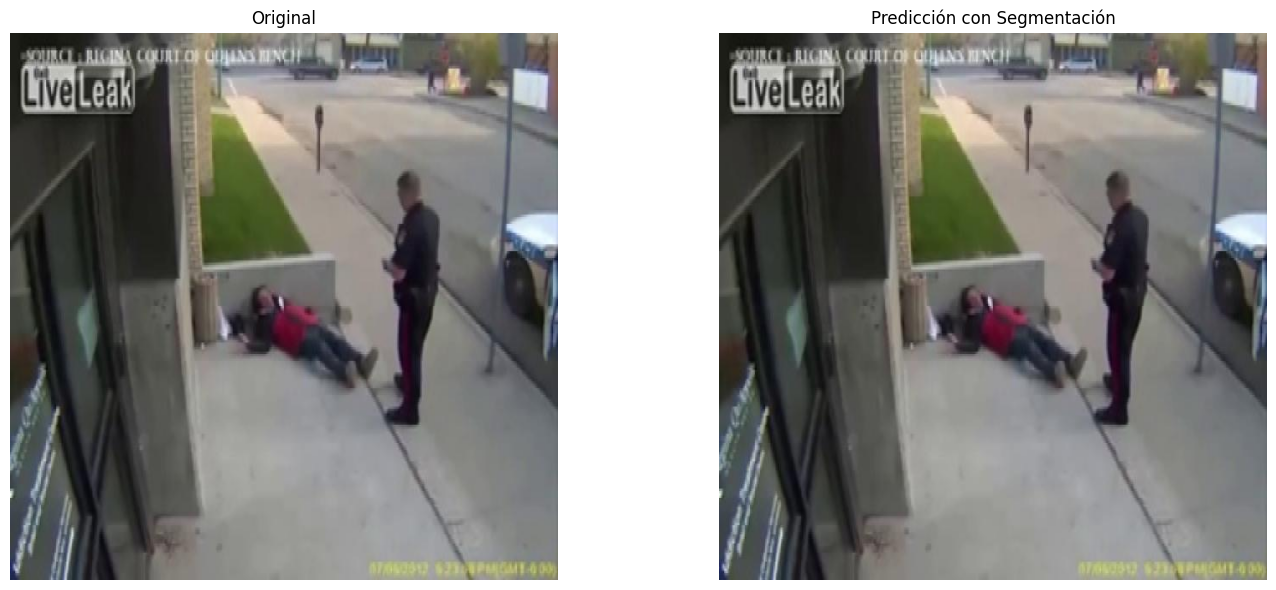

Detectados 0 objetos

Procesando: futbol_frame_01921_jpg.rf.7d5932ee73f21d49045a1c0f35ce56dd.jpg


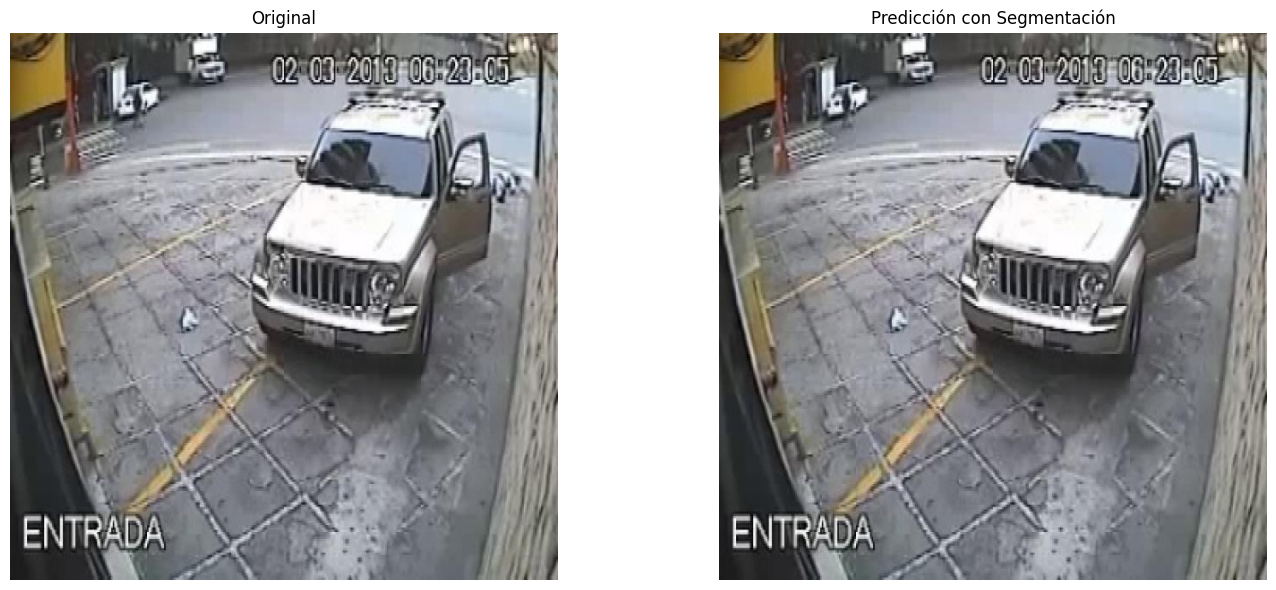

Detectados 0 objetos

Procesando: futbol_frame_01928_jpg.rf.edfe540faf3073d6f25a8e86ea9742ab.jpg


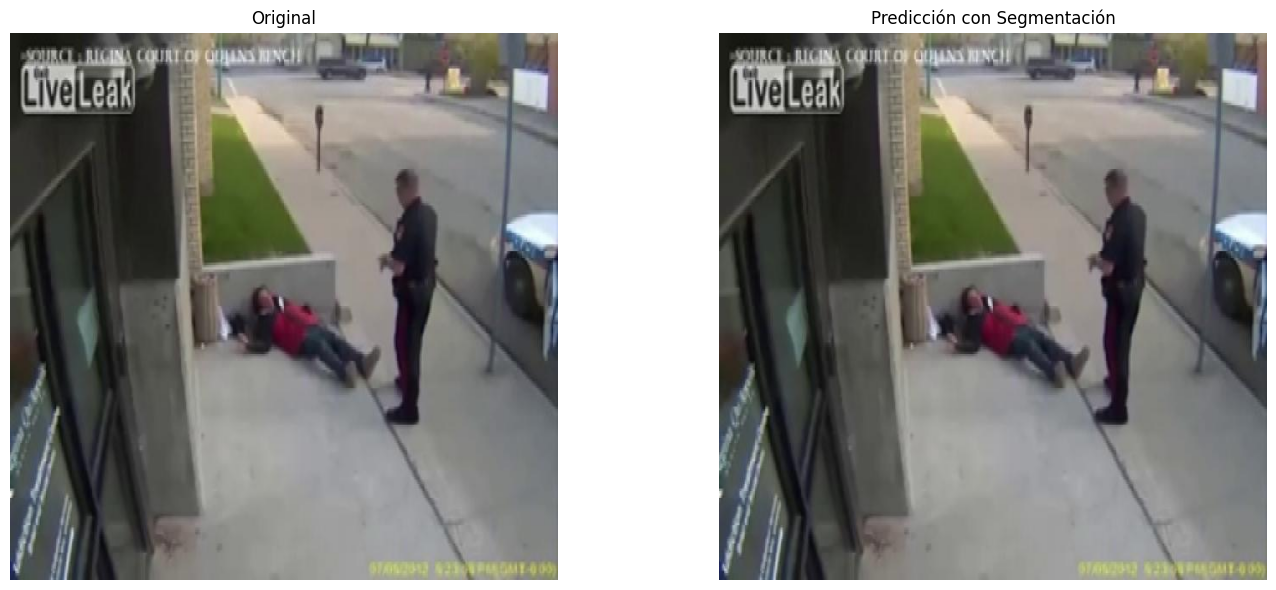

Detectados 0 objetos


In [61]:
probar_en_test(model)

In [62]:
model.save('ucf_segmentation_model.pt')
print("Modelo guardado como ucf_segmentation_model.pt")

Modelo guardado como ucf_segmentation_model.pt
